In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, SimpleRNN, Flatten, GRU, LSTM
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


%matplotlib inline

In [2]:
series = np.sin((0.1 * np.arange(400))**2)

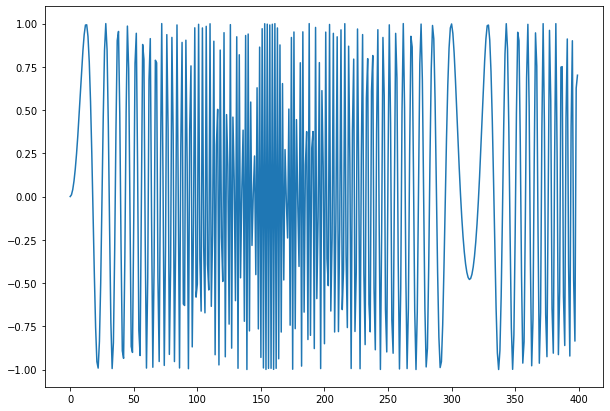

In [3]:
plt.figure(figsize=(10,7))
plt.plot(series)
plt.show()

In [4]:
T = 10
D = 1 
X = []
Y = []
for t in range(len(series) - T):
    x = series[t:t+T]
    X.append(x)
    y = series[t+T]
    Y.append(y)

X = np.array(X).reshape(-1,T)
Y = np.array(Y)
N = len(X)
print ("X.shape: {} Y.shape: {}".format(X.shape,Y.shape))

X.shape: (390, 10) Y.shape: (390,)


In [5]:
i = Input(shape=(T,))
x = Dense(1)(i)
model = Model(i,x)
model.compile(loss='mse', optimizer=Adam(lr=0.01))

r = model.fit(X[:-N//2],Y[:-N//2],epochs=80,validation_data=(X[:-N//2],Y[:-N//2]))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Train on 195 samples, validate on 195 samples
Epoch 1/80
195/195 [==============================] - 0s 1ms/sample - loss: 1.6044 - val_loss: 1.4341
Epoch 2/80
195/195 [==============================] - 0s 82us/sample - loss: 1.3557 - val_loss: 1.2261
Epoch 3/80
195/195 [==============================] - 0s 76us/sample - loss: 1.1677 - val_loss: 1.0529
Epoch 4/80
195/195 [==============================] - 0s 75us/sample - loss: 1.0019 - val_loss: 0.9159
Epoch 5/80
195/195 [==============================] - 0s 76us/sample - loss: 0.8723 - val_loss: 0.8079
Epoch 6/80
195/195 [==============================] - 0s 77us/sample - loss: 0.7755 - val_loss: 0.7216
Epoch 7/80
195/195 [==============================] - 0s 75us/sample - loss: 0.6962 - val_loss: 0.6546
Epoch 8/80
195/195 [==============================] - 0s 83us/sample - loss: 0.6379 - val_loss: 0.6064
Epoch 9/80
195/195 [==============================

Epoch 76/80
195/195 [==============================] - 0s 69us/sample - loss: 0.4898 - val_loss: 0.4899
Epoch 77/80
195/195 [==============================] - 0s 70us/sample - loss: 0.4913 - val_loss: 0.4895
Epoch 78/80
195/195 [==============================] - 0s 70us/sample - loss: 0.4894 - val_loss: 0.4885
Epoch 79/80
195/195 [==============================] - 0s 70us/sample - loss: 0.4886 - val_loss: 0.4871
Epoch 80/80
195/195 [==============================] - 0s 72us/sample - loss: 0.4882 - val_loss: 0.4856


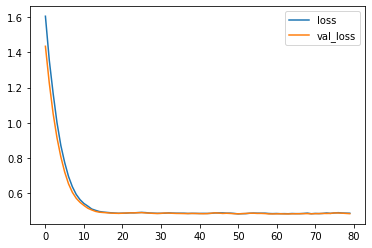

In [6]:
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()
plt.show()

(390, 1)


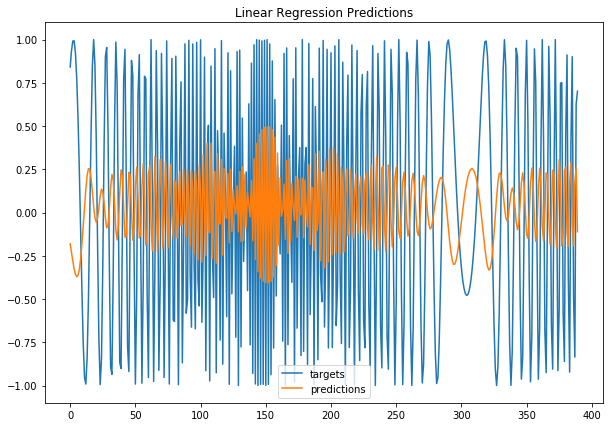

In [7]:
# In-correct way

outputs = model.predict(X)
print (outputs.shape)
predictions = outputs[:,0]
plt.figure(figsize=(10,7))
plt.plot(Y,label='targets')
plt.plot(predictions,label='predictions')
plt.title("Linear Regression Predictions")
plt.legend()
plt.show()

In [8]:
# Wrong way of forecasting.
validation_target = Y[-N//2:]
validation_predictions = []

# index of first validation input
i = -N//2
while len(validation_predictions) < len(validation_target):
    p = model.predict(X[i].reshape(1,-1))[0,0] # we are using the same x values and not the predicted x values for
    i += 1                                     # later predictions, which is in-correct
    
    validation_predictions.append(p)

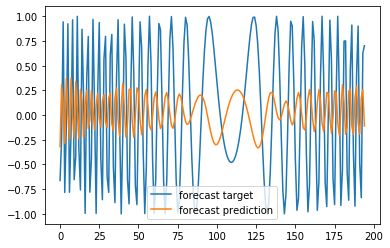

In [9]:
plt.plot(validation_target,label='forecast target')
plt.plot(validation_predictions,label='forecast prediction')
plt.legend()
plt.show()

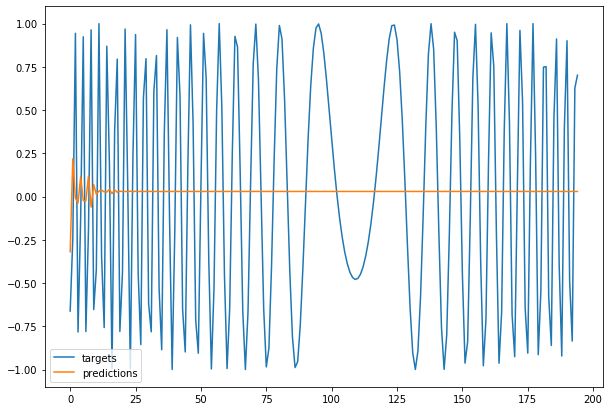

In [10]:
# Correct way of prediction
validation_target = Y[-N//2:]
validation_predictions = []

last_x = X[-N//2]

while len(validation_predictions) < len(validation_target):
    p = model.predict(last_x.reshape(1,-1))[0,0]
    
    validation_predictions.append(p)
    
    last_x = np.roll(last_x,-1)
    last_x[-1] = p

plt.figure(figsize=(10,7))
plt.plot(validation_target,label='targets')
plt.plot(validation_predictions,label='predictions')
plt.legend()
plt.show()
# Linear model is performing really bad.

## RNN MODEL

In [27]:
X = X.reshape(-1,T,1)
# Building model
i = Input(shape=(T,D))
x = SimpleRNN(15)(i)
x = Dense(1)(x)
model = Model(i,x)
model.compile(
    loss='mse',
    optimizer=Adam(lr=0.05)
)

r = model.fit(
    X[:-N//2],
    Y[:-N//2],
    batch_size=32,
    epochs=100,
    validation_data=(X[:-N//2],Y[:-N//2]))

Train on 195 samples, validate on 195 samples
Epoch 1/100
195/195 [==============================] - 1s 5ms/sample - loss: 0.6815 - val_loss: 0.4924
Epoch 2/100
195/195 [==============================] - 0s 322us/sample - loss: 0.5893 - val_loss: 0.4818
Epoch 3/100
195/195 [==============================] - 0s 337us/sample - loss: 0.4593 - val_loss: 0.4539
Epoch 4/100
195/195 [==============================] - 0s 380us/sample - loss: 0.4962 - val_loss: 0.3758
Epoch 5/100
195/195 [==============================] - 0s 396us/sample - loss: 0.5194 - val_loss: 0.5455
Epoch 6/100
195/195 [==============================] - 0s 360us/sample - loss: 0.5116 - val_loss: 0.4476
Epoch 7/100
195/195 [==============================] - 0s 369us/sample - loss: 0.4624 - val_loss: 0.4584
Epoch 8/100
195/195 [==============================] - 0s 380us/sample - loss: 0.5491 - val_loss: 0.4423
Epoch 9/100
195/195 [==============================] - 0s 417us/sample - loss: 0.3972 - val_loss: 0.4124
Epoch 10/10

Epoch 78/100
195/195 [==============================] - 0s 326us/sample - loss: 0.1194 - val_loss: 0.1107
Epoch 79/100
195/195 [==============================] - 0s 283us/sample - loss: 0.0911 - val_loss: 0.0475
Epoch 80/100
195/195 [==============================] - 0s 270us/sample - loss: 0.0675 - val_loss: 0.0500
Epoch 81/100
195/195 [==============================] - 0s 275us/sample - loss: 0.0601 - val_loss: 0.0656
Epoch 82/100
195/195 [==============================] - 0s 267us/sample - loss: 0.0573 - val_loss: 0.0653
Epoch 83/100
195/195 [==============================] - 0s 318us/sample - loss: 0.0537 - val_loss: 0.0508
Epoch 84/100
195/195 [==============================] - 0s 269us/sample - loss: 0.0496 - val_loss: 0.0507
Epoch 85/100
195/195 [==============================] - 0s 284us/sample - loss: 0.0484 - val_loss: 0.0327
Epoch 86/100
195/195 [==============================] - 0s 278us/sample - loss: 0.0431 - val_loss: 0.0390
Epoch 87/100
195/195 [========================

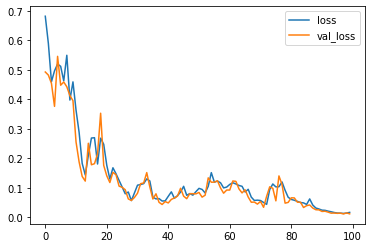

In [28]:
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()
plt.show()

(390, 1)


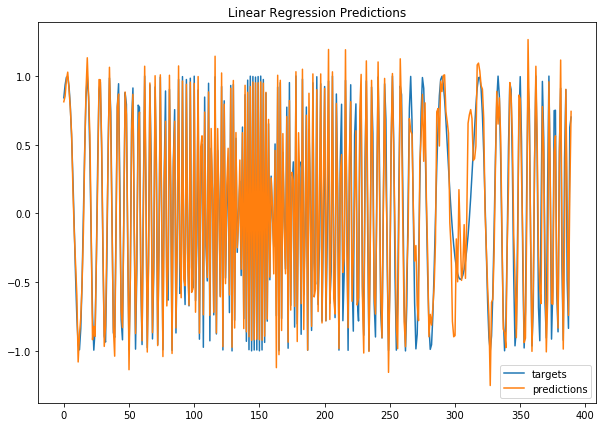

In [29]:
# In-correct way

outputs = model.predict(X)
print (outputs.shape)
predictions = outputs[:,0]
plt.figure(figsize=(10,7))
plt.plot(Y,label='targets')
plt.plot(predictions,label='predictions')
plt.legend()
plt.show()

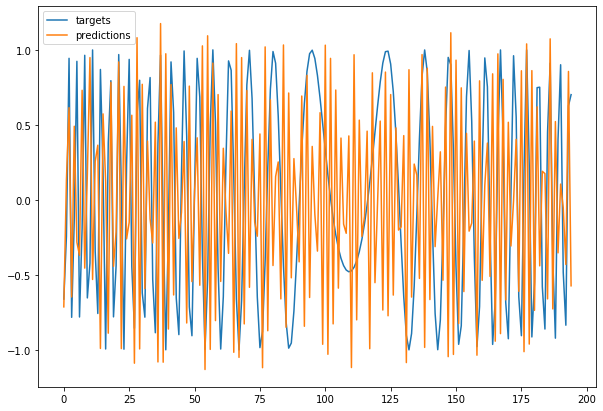

In [30]:
# Correct way of prediction
forecast = []
last_x = X[-N//2]

while len(forecast) < len(Y[-N//2:]):
    f = model.predict(last_x.reshape(1,T,1))[0,0]
    
    forecast.append(f)
    
    last_x = np.roll(last_x,-1)
    last_x[-1] = f

plt.figure(figsize=(10,7))
plt.plot(Y[-N//2:],label='targets')
plt.plot(forecast,label='predictions')
plt.legend()
plt.show()
# Linear model is performing really bad.

## LSTM

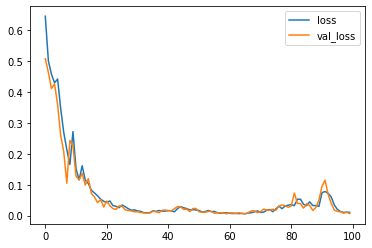

In [31]:
X = X.reshape(-1,T,1)
# Building model
i = Input(shape=(T,D))
x = SimpleRNN(15)(i)
x = Dense(1)(x)
model = Model(i,x)
model.compile(
    loss='mse',
    optimizer=Adam(lr=0.05)
)

r = model.fit(
    X[:-N//2],
    Y[:-N//2],
    batch_size=32,
    epochs=100,
    validation_data=(X[:-N//2],Y[:-N//2]),verbose=0)
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()
plt.show()

(390, 1)


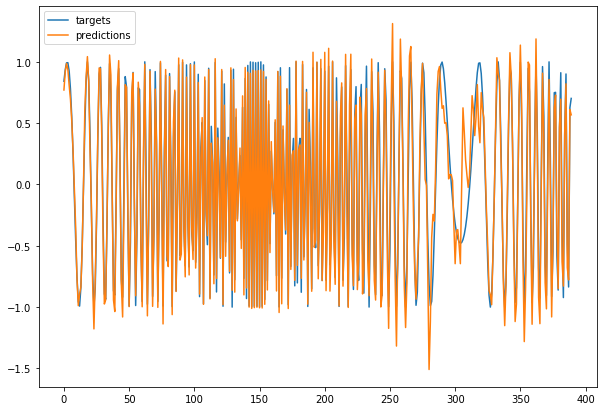

In [32]:
# In-correct way

outputs = model.predict(X)
print (outputs.shape)
predictions = outputs[:,0]
plt.figure(figsize=(10,7))
plt.plot(Y,label='targets')
plt.plot(predictions,label='predictions')
plt.legend()
plt.show()

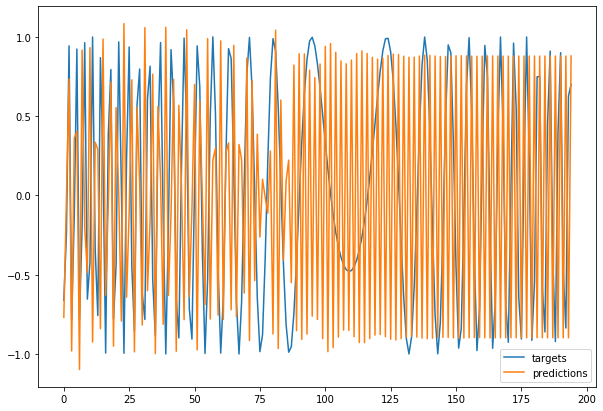

In [33]:
# Correct way of prediction
forecast = []
last_x = X[-N//2]

while len(forecast) < len(Y[-N//2:]):
    f = model.predict(last_x.reshape(1,T,1))[0,0]
    
    forecast.append(f)
    
    last_x = np.roll(last_x,-1)
    last_x[-1] = f

plt.figure(figsize=(10,7))
plt.plot(Y[-N//2:],label='targets')
plt.plot(forecast,label='predictions')
plt.legend()
plt.show()
# Linear model is performing really bad.

## GRU

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


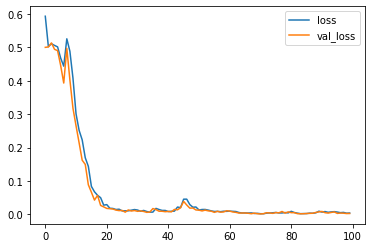

In [34]:
X = X.reshape(-1,T,1)
# Building model
i = Input(shape=(T,D))
x = GRU(15)(i)
x = Dense(1)(x)
model = Model(i,x)
model.compile(
    loss='mse',
    optimizer=Adam(lr=0.05)
)

r = model.fit(
    X[:-N//2],
    Y[:-N//2],
    batch_size=32,
    epochs=100,
    validation_data=(X[:-N//2],Y[:-N//2]),verbose=0)
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()
plt.show()

(390, 1)


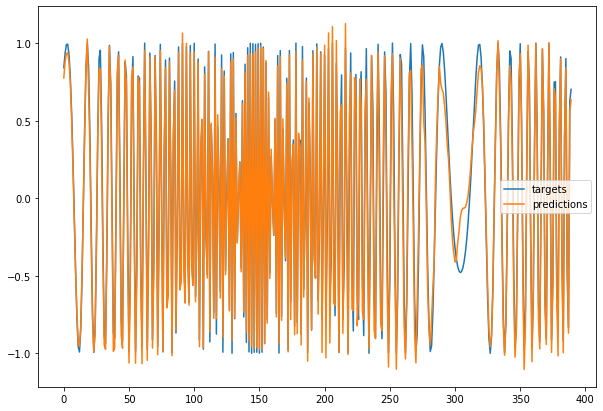

In [35]:
# In-correct way

outputs = model.predict(X)
print (outputs.shape)
predictions = outputs[:,0]
plt.figure(figsize=(10,7))
plt.plot(Y,label='targets')
plt.plot(predictions,label='predictions')
plt.legend()
plt.show()

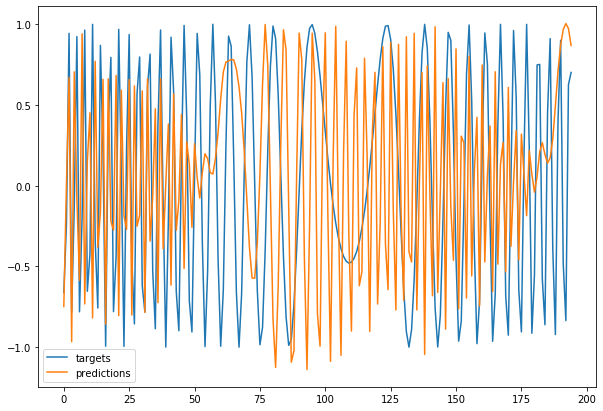

In [36]:
# Correct way of prediction
forecast = []
last_x = X[-N//2]

while len(forecast) < len(Y[-N//2:]):
    f = model.predict(last_x.reshape(1,T,1))[0,0]
    
    forecast.append(f)
    
    last_x = np.roll(last_x,-1)
    last_x[-1] = f

plt.figure(figsize=(10,7))
plt.plot(Y[-N//2:],label='targets')
plt.plot(forecast,label='predictions')
plt.legend()
plt.show()
# Linear model is performing really bad.